In [295]:
import numpy as np
import pandas as pd
%matplotlib inline

# Cleaning data in python


In [296]:
air_df = pd.read_csv('https://assets.datacamp.com/production/course_2023/datasets/airquality.csv')

In [297]:
air_df.head(5)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [298]:
dob_df = pd.read_csv('https://assets.datacamp.com/production/course_2023/datasets/dob_job_application_filings_subset.csv')

/home/dennis/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [299]:
dob_df.head()

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,Owner's Last Name,Owner's Business Name,Owner's House Number,Owner'sHouse Street Name,City,State,Zip,Owner'sPhone #,Job Description,DOBRunDate
0,121577873,2,MANHATTAN,386,PARK AVENUE SOUTH,857,38,1016890,A2,D,...,MIGLIORE,MACKLOWE MANAGEMENT,126,EAST 56TH STREET,NEW YORK,NY,10222,2125545837,GENERAL MECHANICAL & PLUMBING MODIFICATIONS AS...,04/26/2013 12:00:00 AM
1,520129502,1,STATEN ISLAND,107,KNOX PLACE,342,1,5161350,A3,A,...,BLUMENBERG,NA,107,KNOX PLACE,STATEN ISLAND,NY,10314,3477398892,BUILDERS PAVEMENT PLAN 143 LF. ...,04/26/2013 12:00:00 AM
2,121601560,1,MANHATTAN,63,WEST 131 STREET,1729,9,1053831,A2,Q,...,MARKOWITZ,635 RIVERSIDE DRIVE NY LLC,619,WEST 54TH STREET,NEW YORK,NY,10016,2127652555,GENERAL CONSTRUCTION TO INCLUDE NEW PARTITIONS...,04/26/2013 12:00:00 AM
3,121601203,1,MANHATTAN,48,WEST 25TH STREET,826,69,1015610,A2,D,...,CASALE,48 W 25 ST LLC C/O BERNSTEIN,150,WEST 30TH STREET,NEW YORK,NY,10001,2125941414,STRUCTURAL CHANGES ON THE 5TH FLOOR (MOONDOG E...,04/26/2013 12:00:00 AM
4,121601338,1,MANHATTAN,45,WEST 29 STREET,831,7,1015754,A3,D,...,LEE,HYUNG-HYANG REALTY CORP,614,8 AVENUE,NEW YORK,NY,10001,2019881222,FILING HEREWITH FACADE REPAIR PLANS. WORK SCOP...,04/26/2013 12:00:00 AM


 - Create a histogram of the 'Existing Zoning Sqft' column. Rotate the axis labels by 70 degrees and use a log scale for both axes.
 - Display the histogram using plt.show().

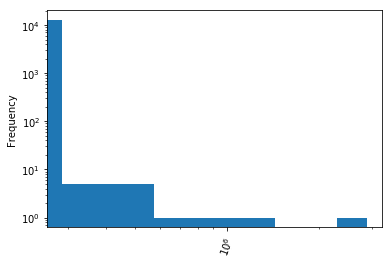

In [300]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Plot the histogram
dob_df['Existing Zoning Sqft'].plot(kind='hist', rot=70, logx=True, logy=True)

# Display the histogram
plt.show()

While visualizing your data is a great way to understand it, keep in mind that no one technique is better than another. As you saw here, you still needed to look at the summary statistics to help understand your data better. You expected a large amount of counts on the left side of the plot because the 25th, 50th, and 75th percentiles have a value of 0. The plot shows us that there are barely any counts near the max value, signifying an outlier.

KeyError: 'Column not found: initial_cost'

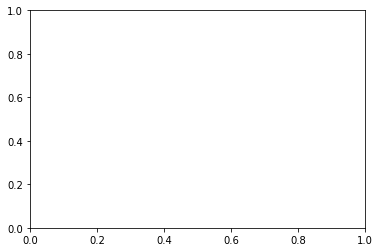

In [301]:
# Create the boxplot
dob_df.boxplot(column='initial_cost', by='Borough', rot=90)

# Display the plot
plt.show()

## Reshaping your data using melt
Melting data is the process of turning columns of your data into rows of data. Consider the DataFrames from the previous exercise. In the tidy DataFrame, the variables Ozone, Solar.R, Wind, and Temp each had their own column. If, however, you wanted these variables to be in rows instead, you could melt the DataFrame. In doing so, however, you would make the data untidy! This is important to keep in mind: Depending on how your data is represented, you will have to reshape it differently.

In this exercise, you will practice melting a DataFrame using pd.melt(). There are two parameters you should be aware of: id_vars and value_vars. The id_vars represent the columns of the data you do not want to melt (i.e., keep it in its current shape), while the value_vars represent the columns you do wish to melt into rows. By default, if no value_vars are provided, all columns not set in the id_vars will be melted. This could save a bit of typing, depending on the number of columns that need to be melted.

The (tidy) DataFrame airquality has been pre-loaded. Your job is to melt its Ozone, Solar.R, Wind, and Temp columns into rows. Later in this chapter, you'll learn how to bring this melted DataFrame back into a tidy form.

 - Print the head of airquality.
 - Use pd.melt() to melt the Ozone, Solar.R, Wind, and Temp columns of airquality into rows. Do this by using id_vars to specify the columns you do not wish to melt: 'Month' and 'Day'.
Print the head of airquality_melt.

In [ ]:
air_df.head()

In [ ]:
airquality_melt = pd.melt(air_df, id_vars=['Month','Day'], value_vars=['Ozone', 'Solar.R', 'Wind', 'Temp'])

In [ ]:
airquality_melt.head()

## Customizing melted data
When melting DataFrames, it would be better to have column names more meaningful than variable and value.

The default names may work in certain situations, but it's best to always have data that is self explanatory.

You can rename the variable column by specifying an argument to the var_name parameter, and the value column by specifying an argument to the value_name parameter. You will now practice doing exactly this. 

In [ ]:
# Melt airquality: airquality_melt
airquality_melt = pd.melt(air_df, id_vars=['Month', 'Day'], 
                value_vars=['Ozone', 'Solar.R', 'Wind','Temp'], 
                var_name= 'measurement', value_name='reading')

In [ ]:
airquality_melt.head(5)

## Pivot data
Pivoting data is the opposite of melting it. Remember the tidy form that the airquality DataFrame was in before you melted it? You'll now begin pivoting it back into that form using the .pivot_table() method!

While melting takes a set of columns and turns it into a single column, pivoting will create a new column for each unique value in a specified column.

.pivot_table() has an index parameter which you can use to specify the columns that you don't want pivoted: It is similar to the id_vars parameter of pd.melt(). Two other parameters that you have to specify are columns (the name of the column you want to pivot), and values (the values to be used when the column is pivoted). 
 - Pivot airquality_melt by using .pivot_table() with the rows indexed by 'Month' and 'Day', the columns indexed by 'measurement', and the values populated with 'reading'.

In [ ]:
airquality_pivot = airquality_melt.pivot_table(index=['Month', 'Day'], columns='measurement', values='reading')

In [ ]:
airquality_pivot.head()

## Resetting the index of a DataFrame
After pivoting airquality_melt in the previous exercise, you didn't quite get back the original DataFrame.

What we got back instead was a pandas DataFrame with a hierarchical index (also known as a MultiIndex).
There's a very simple method you can use to get back the original DataFrame from the pivoted DataFrame: .reset_index()

In [ ]:
airquality_pivot.index

In [302]:
# Reset the index of airquality_pivot: airquality_pivot
airquality_pivot = airquality_pivot.reset_index()

In [303]:
airquality_pivot.index

RangeIndex(start=0, stop=153, step=1)

In [304]:
airquality_pivot.head()

measurement,index,Month,Day,Ozone,Solar.R,Temp,Wind
0,0,5,1,41.0,190.0,67.0,7.4
1,1,5,2,36.0,118.0,72.0,8.0
2,2,5,3,12.0,149.0,74.0,12.6
3,3,5,4,18.0,313.0,62.0,11.5
4,4,5,5,NaN,NaN,56.0,14.3


Pivoting duplicate values
So far, you've used the .pivot_table() method when there are multiple index values you want to hold constant during a pivot. we can also use pivot tables to deal with duplicate values by providing an aggregation function through the aggfunc parameter. Here, you're going to combine both these uses of pivot tables.

Let's say your data collection method accidentally duplicated your dataset. By using .pivot_table() and the aggfunc parameter, you can not only reshape your data, but also remove duplicates. Finally, you can then flatten the columns of the pivoted DataFrame using .reset_index().

In [305]:
airquality_pivot = airquality_melt.pivot_table(index=['Month', 'Day'], columns='measurement', values='reading', aggfunc=np.mean)

In [306]:
airquality_pivot = airquality_pivot.reset_index()

In [307]:
airquality_pivot.head()

measurement,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4
1,5,2,36.0,118.0,72.0,8.0
2,5,3,12.0,149.0,74.0,12.6
3,5,4,18.0,313.0,62.0,11.5
4,5,5,NaN,NaN,56.0,14.3


## Splitting a column with .str
The tb dataset consisting of case counts of tuberculosis by country, year, gender, and age group, has been pre-loaded into a DataFrame as tb.

In this exercise, you're going to tidy the 'm014' column, which represents males aged 0-14 years of age. In order to parse this value, you need to extract the first letter into a new column for gender, and the rest into a column for age_group. Here, since you can parse values by position, you can take advantage of pandas' vectorized string slicing by using the str attribute of columns of type object.

## Instructions

- Melt tb keeping 'country' and 'year' fixed.
- Create a 'gender' column by slicing the first letter of the variable column of tb_melt.
- Create an 'age_group' column by slicing the rest of the variable column of tb_melt.
- Print the head of tb_melt. This has been done for you, so hit 'Submit Answer' to see the results!


In [308]:
tb = pd.read_csv('https://assets.datacamp.com/production/course_2023/datasets/tb.csv')

In [309]:
# Melt tb: tb_melt
tb_melt = pd.melt(tb, id_vars=['country', 'year'])

# Create the 'gender' column
tb_melt['gender'] = tb_melt.variable.str[0]

# Create the 'age_group' column
tb_melt['age_group'] = tb_melt.variable.str[1:]

In [310]:
tb_melt.head()

,country,year,variable,value,gender,age_group
0,AD,2000,m014,0.0,m,014
1,AE,2000,m014,2.0,m,014
2,AF,2000,m014,52.0,m,014
3,AG,2000,m014,0.0,m,014
4,AL,2000,m014,2.0,m,014


## Splitting a column with .split() and .get()
Another common way multiple variables are stored in columns is with a delimiter. 
This time, you cannot directly slice the variable by position as in the previous exercise. You now need to use Python's built-in string method called .split(). By default, this method will split a string into parts separated by a space. However, in this case you want it to split by an underscore. You can do this on Cases_Guinea, for example, using Cases_Guinea.split('_'), which returns the list ['Cases', 'Guinea'].

The next challenge is to extract the first element of this list and assign it to a type variable, and the second element of the list to a country variable. You can accomplish this by accessing the str attribute of the column and using the .get() method to retrieve the 0 or 1 index, depending on the part you want.
## Instructions

- Melt ebola using 'Date' and 'Day' as the id_vars, 'type_country' as the var_name, and 'counts' as the value_name.
- Create a column called 'str_split' by splitting the 'type_country' column of ebola_melt on '_'. Note that you will first have to access the str attribute of type_country before you can use .split().
- Create a column called 'type' by using the .get() method to retrieve index 0 of the 'str_split' column of ebola_melt.
- Create a column called 'country' by using the .get() method to retrieve index 1 of the 'str_split' column of ebola_melt.
- Print the head of ebola. This has been done for you, so hit 'Submit Answer' to view the results!

In [311]:
ebola = pd.read_csv('https://assets.datacamp.com/production/course_2023/datasets/ebola.csv')

In [312]:
ebola.columns

Index(['Date', 'Day', 'Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain',
       'Cases_Mali', 'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

In [313]:
ebola.head(5)

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [314]:
# Melt ebola: ebola_melt
ebola_melt = pd.melt(ebola, id_vars=['Date','Day'], var_name='type_country', value_name='counts')

# Create the 'str_split' column
ebola_melt['str_split'] = ebola_melt['type_country'].str.split('_')

In [315]:
ebola_melt.head()

,Date,Day,type_country,counts,str_split
0,1/5/2015,289,Cases_Guinea,2776.0,"[Cases, Guinea]"
1,1/4/2015,288,Cases_Guinea,2775.0,"[Cases, Guinea]"
2,1/3/2015,287,Cases_Guinea,2769.0,"[Cases, Guinea]"
3,1/2/2015,286,Cases_Guinea,NaN,"[Cases, Guinea]"
4,12/31/2014,284,Cases_Guinea,2730.0,"[Cases, Guinea]"


In [316]:
# Create the 'type' column
ebola_melt['type'] = ebola_melt.str_split.str.get(0)

# Create the 'country' column
ebola_melt['country'] = ebola_melt.str_split.str.get(1)

In [317]:
ebola_melt.head()

,Date,Day,type_country,counts,str_split,type,country
0,1/5/2015,289,Cases_Guinea,2776.0,"[Cases, Guinea]",Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,"[Cases, Guinea]",Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,"[Cases, Guinea]",Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,"[Cases, Guinea]",Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,"[Cases, Guinea]",Cases,Guinea


# Combining data for analysis
The ability to transform and combine your data is a crucial skill in data science, because your data may not always come in one monolithic file or table for you to load. A large dataset may be broken into separate datasets to facilitate easier storage and sharing. Or if you are dealing with time series data, for example, you may have a new dataset for each day. No matter the reason, it is important to be able to combine datasets so you can either clean a single dataset, or clean each dataset separately and then combine them later so you can run your analysis on a single dataset. In this chapter, you'll learn all about combining data.

## Combining columns of data
Think of column-wise concatenation of data as stitching data together from the sides instead of the top and bottom. To perform this action, you use the same pd.concat() function, but this time with the keyword argument axis=1. The default, axis=0, is for a row-wise concatenation.



In [318]:
# create a new dataframe 
status_country = ebola_melt[['type','country']]
status_country.columns = ['status','country']
status_country.head()

,status,country
0,Cases,Guinea
1,Cases,Guinea
2,Cases,Guinea
3,Cases,Guinea
4,Cases,Guinea


In [319]:
# copy ebola_melt
melt_ebola = ebola_melt.copy(deep=True)

In [320]:
# drop type and country columns
melt_ebola = melt_ebola.drop(columns=['type','country'])
melt_ebola.head()

,Date,Day,type_country,counts,str_split
0,1/5/2015,289,Cases_Guinea,2776.0,"[Cases, Guinea]"
1,1/4/2015,288,Cases_Guinea,2775.0,"[Cases, Guinea]"
2,1/3/2015,287,Cases_Guinea,2769.0,"[Cases, Guinea]"
3,1/2/2015,286,Cases_Guinea,NaN,"[Cases, Guinea]"
4,12/31/2014,284,Cases_Guinea,2730.0,"[Cases, Guinea]"


In [321]:
# Concatenate ebola_melt and status_country column-wise: ebola_tidy
ebola_tidy = pd.concat([melt_ebola, status_country], axis=1)

# Print the shape of ebola_tidy
print(ebola_tidy.shape)


(1952, 7)


In [322]:

# Print the head of ebola_tidy
ebola_tidy.head()


,Date,Day,type_country,counts,str_split,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,"[Cases, Guinea]",Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,"[Cases, Guinea]",Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,"[Cases, Guinea]",Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,"[Cases, Guinea]",Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,"[Cases, Guinea]",Cases,Guinea


# Finding and concatenating data
## Finding files that match a pattern
We're now going to practice using the glob module to find all csv files in the workspace. In the next exercise, we'll programmatically load them into DataFrames.

The glob module has a function called glob that takes a pattern and returns a list of the files in the working directory that match that pattern.

For example, if you know the pattern is part_ single digit number .csv, you can write the pattern as 'part_?.csv' (which would match part_1.csv, part_2.csv, part_3.csv, etc.)

Similarly, you can find all .csv files with '*.csv', or all parts with 'part_*'. The ? wildcard represents any 1 character, and the * wildcard represents any number of characters.

In [323]:
import glob

In [324]:
# Write the pattern: pattern
pattern = 'uber*.csv'

# Save all file matches: csv_files
csv_files = glob.glob(pattern)

# Print the file names
print(csv_files)
data_list = []
for csv in csv_files:
    df = pd.read_csv(csv)
    data_list.append(df)
    


['uber1.csv', 'uber.csv', 'uber2.csv']


In [325]:
# Load the second file into a DataFrame: csv2
uber = pd.concat(data_list)

# Print the head of csv2
uber.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


# Using regular expressions to clean strings

When working with data, it is sometimes necessary to write a regular expression to look for properly entered values. Phone numbers in a dataset is a common field that needs to be checked for validity. Your job in this exercise is to define a regular expression to match US phone numbers that fit the pattern of xxx-xxx-xxxx.

## Instruction
- Compile a pattern that matches a phone number of the format xxx-xxx-xxxx.
 * Use \d{x} to match x digits. Here you'll need to use it three times: twice to match 3 digits, and once to match 4 digits.
 * Place the regular expression inside re.compile().
- Using the .match() method on prog, check whether the pattern matches the string '123-456-7890'.
Using the same approach, now check whether the pattern matches the string '1123-456-7890'.

In [326]:
import re

In [327]:
pattern = re.compile('\$\d*\.\d{2}')
result = pattern.match('$17.89')

In [328]:
bool(result)

True

In [329]:
# Compile the pattern: prog
prog = re.compile('\d{3}-\d{3}-\d{4}')

In [330]:
# See if the pattern matches
result = prog.match('123-456-7890')

In [331]:
bool(result)

True

In [332]:
result = prog.match('1123-456-7890')
bool(result)

False

# Extracting numerical values from strings
Extracting numbers from strings is a common task, particularly when working with unstructured data or log files.

`Say you have the following string: 'the recipe calls for 6 strawberries and 2 bananas`

It would be useful to extract the 6 and the 2 from this string to be saved for later use when comparing strawberry to banana ratios.

When using a regular expression to extract multiple numbers (or multiple pattern matches, to be exact), you can use the `re.findall()` function. Dan did not discuss this in the video, but it is straightforward to use: You pass in a pattern and a string to `re.findall()`, and it will return a list of the matches.

## Instruction

- Write a pattern that will find all the numbers in the following string: `the recipe calls for 10 strawberries and 1 banana`
 To do this:
 - Use the re.findall() function and pass it two arguments: the pattern, followed by the string.
 - `\d` is the pattern required to find digits. This should be followed with a `+` so that the previous element is matched one or more times. This ensures that `10` is viewed as one number and not as `1` and `0`.
- Print the matches to confirm that your regular expression found the values `10` and `1`.

In [333]:
# Find the numeric values: matches
matches = re.findall('\d+', 'the recipe calls for 10 strawberries and 1 banana')

# Print the matches
print(matches)

['10', '1']


## More Pattern matching
- Write patterns to match:
  - A telephone number of the format `xxx-xxx-xxxx`. You already did this in a previous exercise.
  - A string of the format: A dollar sign, an arbitrary number of digits, a decimal point, `2` digits.
     - Use `\$` to match the dollar sign, `\d*` to match an arbitrary  number of digits, `\`. to match the decimal point, and `\d{x}` to match `x` number of digits.
- A capital letter, followed by an arbitrary number of alphanumeric characters.
  - Use `[A-Z]` to match any capital letter followed by `\w*` to match an arbitrary number of alphanumeric characters.

In [334]:
# Write the first pattern
pattern1 = bool(re.match(pattern='\d{3}-\d{3}-\d{4}', string='123-456-7890'))
pattern1

True

In [335]:
# Write the second pattern
pattern2 = bool(re.match(pattern='\$\d*\.\d{2}', string='$123.45'))
pattern2

True

In [336]:
# Write the third pattern
pattern3 = bool(re.match(pattern='[A-Z]\w*', string='Australia'))
pattern3

True

# Using functions to clean data
## Custom functions to clean data
the tips dataset will be used. It has a 'sex' column that contains the values `'Male'` or `'Female'`. Your job is to write a function that will recode `'Male'` to `1`, `'Female'` to `0`, and return np.nan for all entries of `'sex'` that are neither `'Male'` nor `'Female'`.

Recoding variables like this is a common data cleaning task. Functions provide a mechanism for you to abstract away complex bits of code as well as reuse code. This makes your code more readable and less error prone.

You can use the .apply() method to apply a function across entire rows or columns of DataFrames. However, note that each column of a DataFrame is a pandas Series. Functions can also be applied across Series. Here, you will apply your function over the `'sex'` column.

## Instructions
- Define a function named `recode_sex()` that has one parameter: sex_value.
  - If sex_value equals `'Male'`, return `1`.
  - Else, if `sex_value` equals `'Female'`, return `0`.
  - If sex_value does not equal `'Male'` or `'Female'`, return `np.nan`. 
- Apply your `recode_sex()` function over `tips.sex` using the `.apply()` method to create a new column: 'sex_recode'. Note that when passing in a function inside the `.apply()` method, you don't need to specify the parentheses after the function name.


In [337]:
tips = pd.read_csv('tips.csv')

In [338]:
# Define recode_sex()
def recode_sex(sex_value):

    # Return 1 if sex_value is 'Male'
    if sex_value == 'Male':
        return 1
    
    # Return 0 if sex_value is 'Female'    
    elif sex_value == 'Female':
        return 0
    
    # Return np.nan    
    else:
        return np.nan

In [339]:
# Apply the function to the sex column
tips['sex_recode'] = tips.sex.apply(recode_sex)

In [340]:
tips.head()

,total_dollar,tip,sex,smoker,day,time,size,sex_recode
0,$16.99,$1.01,Female,No,Sun,Dinner,2,0
1,$10.34,$1.66,Male,No,Sun,Dinner,3,1
2,$21.01,$3.50,Male,No,Sun,Dinner,3,1
3,$23.68,$3.31,Male,No,Sun,Dinner,2,1
4,$24.59,$3.61,Female,No,Sun,Dinner,4,0


## Lambda functions
Instead of using the def syntax that you used in the previous exercise, lambda functions let you make simple, one-line functions.

For example, here's a function that squares a variable used in an `.apply()` method:

```def my_square(x):
       return x ** 2```


`df.apply(my_square)`

The equivalent code using a lambda function is:

```df.apply(lambda x: x ** 2)```

The lambda function takes one parameter `-` the variable `x`. The function itself just squares x and returns the result, which is whatever the one line of code evaluates to. In this way, lambda functions can make your code concise and Pythonic.

The tips dataset has been pre-loaded into a DataFrame called tips. Your job is to clean its 'total_dollar' column by removing the dollar sign. You'll do this using two different methods: With the `.replace()` method, and with regular expressions. The regular expression module re has been pre-imported.

## Intructions

- Use the `.replace()` method inside a lambda function to remove the dollar sign from the 'total_dollar' column of tips.
  - You need to specify two arguments to the `.replace()` method: The string to be replaced `('$')`, and the string to replace it by `('')`.
  - Apply the lambda function over the 'total_dollar' column of tips.
- Use a regular expression to remove the dollar sign from the `'total_dollar'` column of tips.
  - The pattern has been provided for you: It is the first argument of the `re.findall()` function.
  - Complete the rest of the lambda function and apply it over the `'total_dollar'` column of tips. Notice that because `re.findall()` returns a list, you have to slice it in order to access the actual value.

In [341]:
# Write the lambda function using replace
tips['total_dollar_replace'] = tips['total_dollar'].apply(lambda x: x.replace('$', ''))

In [342]:
# Write the lambda function using regular expressions
tips['total_dollar_re'] = tips['total_dollar'].apply(lambda x: re.findall('\d+\.\d+', x)[0])


In [343]:
tips.head()

,total_dollar,tip,sex,smoker,day,time,size,sex_recode,total_dollar_replace,total_dollar_re
0,$16.99,$1.01,Female,No,Sun,Dinner,2,0,16.99,16.99
1,$10.34,$1.66,Male,No,Sun,Dinner,3,1,10.34,10.34
2,$21.01,$3.50,Male,No,Sun,Dinner,3,1,21.01,21.01
3,$23.68,$3.31,Male,No,Sun,Dinner,2,1,23.68,23.68
4,$24.59,$3.61,Female,No,Sun,Dinner,4,0,24.59,24.59


# Duplicate and missing data
## Dropping duplicate data
Duplicate data causes a variety of problems. From the point of view of performance, they use up unnecessary amounts of memory and cause unneeded calculations to be performed when processing data. In addition, they can also bias any analysis results.

A dataset consisting of the performance of songs on the Billboard charts has been pre-loaded into a DataFrame called billboard. Check out its columns in the IPython Shell. Your job in this exercise is to subset this DataFrame and then drop all duplicate rows.

In [344]:
tracks = pd.read_csv('tracks.csv')

In [345]:
# Print info of tracks
print(tracks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19967 entries, 0 to 19966
Data columns (total 4 columns):
year      19967 non-null int64
artist    19967 non-null object
track     19967 non-null object
time      19967 non-null object
dtypes: int64(1), object(3)
memory usage: 624.0+ KB
None


In [346]:
# Drop the duplicates: tracks_no_duplicates
tracks_no_duplicates = tracks.drop_duplicates()

# Print info of tracks
print(tracks_no_duplicates.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 316
Data columns (total 4 columns):
year      317 non-null int64
artist    317 non-null object
track     317 non-null object
time      317 non-null object
dtypes: int64(1), object(3)
memory usage: 12.4+ KB
None


# Filling missing data
Here, you'll return to the airquality dataset from Chapter 2. It has been pre-loaded into the DataFrame airquality, and it has missing values for you to practice filling in. Explore airquality in the IPython Shell to checkout which columns have missing values.

It's rare to have a (real-world) dataset without any missing values, and it's important to deal with them because certain calculations cannot handle missing values while some calculations will, by default, skip over any missing values.

Also, understanding how much missing data you have, and thinking about where it comes from is crucial to making unbiased interpretations of data.

In [347]:
airquality = pd.read_csv('airquality.csv')

In [348]:
# Calculate the mean of the Ozone column: oz_mean
oz_mean = airquality['Ozone'].mean()

In [349]:
airquality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
Ozone      84 non-null float64
Solar.R    146 non-null float64
Wind       153 non-null float64
Temp       153 non-null int64
Month      153 non-null int64
Day        153 non-null int64
dtypes: float64(3), int64(3)
memory usage: 7.2 KB


In [350]:
# Replace all the missing values in the Ozone column with the mean
airquality['Ozone'] = airquality['Ozone'].fillna(oz_mean)

In [351]:
airquality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
Ozone      153 non-null float64
Solar.R    146 non-null float64
Wind       153 non-null float64
Temp       153 non-null int64
Month      153 non-null int64
Day        153 non-null int64
dtypes: float64(3), int64(3)
memory usage: 7.2 KB


# Testing with asserts
We use the `.all()` method together with the `.notnull()` DataFrame method to check for missing values in a column. The `.all()` method returns True if all values are True. When used on a DataFrame, it returns a Series of Booleans - one for each column in the DataFrame. So if you are using it on a DataFrame, like in this exercise, you need to chain another `.all()` method so that you return only one True or False value. When using these within an assert statement, nothing will be returned if the assert statement is true: This is how you can confirm that the data you are checking are valid.

Note: You can use `pd.notnull(df)` as an alternative to `df.notnull()`.

In [352]:
# Assert that there are no missing values
ebola1 = pd.read_csv('ebola.csv')
assert pd.notnull(ebola1).all().all()

In [353]:
# Assert that all values are >= 0
assert (ebola1 >= 0).all().all()

In [354]:
ebola1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Columns: 2092 entries, 'Date to 0.0\n'
dtypes: object(2092)
memory usage: 0.0+ bytes


In [355]:
ebola1.head()

,'Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,...,0.0.1158,0.0.1159,29.0,0.0.1160,0.0.1161,0.0.1162,0.0.1163,0.0.1164,0.0.1165,0.0\n'


In [358]:
with open('g1800s.txt') as f:
    reader = f.read()
    data = reader.split('\\n')

header = data[0].split(',')
header = [a.strip("'") for a in header]
lista = [a.split(',') for a in data[1:]]   
g1800s = pd.DataFrame(lista)
g1800s = g1800s.iloc[:, :-1]
g1800s.columns = header
g1800s.to_csv("g1800s.csv", index=False)

# Putting it all together
## Visualizing data
Here, the goal is to visually check the data for insights as well as errors. When looking at the plot, pay attention to whether the scatter plot takes the form of a diagonal line, and which points fall below or above the diagonal line. This will inform how life expectancy in 1899 changed (or did not change) compared to 1800 for different countries. If points fall on a diagonal line, it means that life expectancy remained the same!

In [364]:
g1800s = pd.read_csv('g1800s.csv')
g1900s = pd.read_csv('g1900s.csv')
g2000s = pd.read_csv('g2000s.csv')

In [365]:
g1800s.shape

(262, 101)

In [366]:
g1800s.head(5)

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,27.29,27.28,27.27,27.26,27.25,27.24,27.23,27.22,27.21,27.20
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82


In [367]:
g1800s['1800'] = pd.to_numeric(g1800s['1800'])

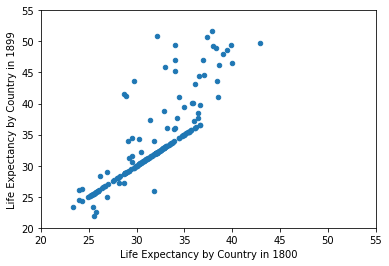

In [368]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create the scatter plot
g1800s.plot(kind='scatter', x='1800', y='1899')

# Specify axis labels
plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 1899')

# Specify axis limits
plt.xlim(20, 55)
plt.ylim(20, 55)

# Display the plot
plt.show()

In [369]:
def check_null_or_valid(row_data):
    """Function that takes a row of data,
    drops all missing values,
    and checks if all remaining values are greater than or equal to 0
    """
    no_na = row_data.dropna()[1:-1]
    numeric = pd.to_numeric(no_na)
    ge0 = numeric >= 0
    return ge0



In [370]:
# Check whether the first column is 'Life expectancy'
assert g1800s.columns[0] == 'Life expectancy'

# Check whether the values in the row are valid
assert g1800s.iloc[:, 1:].apply(check_null_or_valid, axis=1).all().all()

# Check that there is only one instance of each country
assert g1800s['Life expectancy'].value_counts()[0] == 1

##  Concatenate the DataFrames row-wise

In [371]:
gapminder = pd.concat([g1800s, g1900s, g2000s], axis=0)

## Reshaping your data
Currently, the gapminder DataFrame has a separate column for each year. What you want instead is a single column that contains the year, and a single column that represents the average life expectancy for each year and country. By having year in its own column, you can use it as a predictor variable in a later analysis.

You can convert the DataFrame into the desired tidy format by melting it.

In [372]:
# Melt gapminder: gapminder_melt
gapminder_melt = pd.melt(gapminder, id_vars='Life expectancy')

# Rename the columns
gapminder_melt.columns = ['country', 'year', 'life_expectancy']

In [373]:
gapminder_melt.head()

,country,year,life_expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82


## Checking the data types
We need to ensure that the columns are of the proper data type. That is, you need to ensure that country is of type object, year is of type int64, and life_expectancy is of type float64.

In [374]:
 # Convert the year column to numeric
gapminder = gapminder_melt
gapminder.year = pd.to_numeric(gapminder['year'])

In [375]:
# Test if country is of type object
assert gapminder.country.dtypes == np.object

In [376]:
# Test if year is of type int64
assert gapminder.year.dtypes == np.int64

In [377]:
# Test if life_expectancy is of type float64
assert gapminder.life_expectancy.dtypes == np.float64

In [378]:
assert g1900s.columns[0] == 'Life expectancy'

## Looking at country spellings
Having tidied the DataFrame and checked the data types, your next task in the data cleaning process is to look at the 'country' column to see if there are any special or invalid characters we may need to deal with.
It is reasonable to assume that country names will contain:

 - The set of lower and upper case letters.
 - Whitespace between words.
 - Periods for any abbreviations.
 
To confirm that this is the case, you can leverage the power of regular expressions again. For common operations like this, Python has a built-in string method `- str.contains() -` which takes a regular expression pattern, and applies it to the Series, returning `True` if there is a match, and `False` otherwise.



In [379]:
# Create the series of countries: countries
countries = gapminder['country']

In [380]:
# Drop all the duplicates from countries
countries = countries.drop_duplicates()
countries.value_counts()

Norfolk Island             1
Liberia                    1
Guyana                     1
Jersey                     1
Samoa                      1
Bahrain                    1
Somaliland                 1
Cook Is                    1
Aruba                      1
New Caledonia              1
"Macao  China"             1
Guinea-Bissau              1
South Africa               1
St.-Pierre-et-Miquelon     1
St. Barthélemy             1
Netherlands Antilles       1
India                      1
Panama                     1
South Yemen (former)       1
United Arab Emirates       1
Burkina Faso               1
Rwanda                     1
Bahamas                    1
Switzerland                1
St. Helena                 1
Brunei                     1
Namibia                    1
Maldives                   1
Barbados                   1
Monaco                     1
                          ..
West Germany               1
Timor-Leste                1
Slovak Republic            1
United States 

Write a regular expression that tests your assumptions of what characters belong in countries:
 - Anchor the pattern to match exactly what you want by placing a `^` in the beginning and `$` in the end.
 - Use `A-Za-z` to match the set of lower and upper case letters, `\.` to match periods, and `\s` to match whitespace between words.

In [381]:
# Write the regular expression: pattern
pattern = '^[A-Za-z\.\s]*$'

In [382]:
# Create the Boolean vector: mask
mask = countries.str.contains(pattern)

In [383]:
# Invert the mask: mask_inverse
mask_inverse = ~mask

In [384]:
# Subset countries using mask_inverse: invalid_countries
invalid_countries = countries[mask_inverse]

In [385]:
invalid_countries

49          "Congo  Dem. Rep."
50               "Congo  Rep."
53              Cote d\'Ivoire
73      Falkland Is (Malvinas)
93               Guinea-Bissau
98          "Hong Kong  China"
118     "United Korea (former)
119                          "
132             "Macao  China"
133           "Macedonia  FYR"
146    "Micronesia  Fed. Sts."
162            Ngorno-Karabakh
188             St. Barthélemy
194     St.-Pierre-et-Miquelon
226                Timor-Leste
252      Virgin Islands (U.S.)
253       North Yemen (former)
254       South Yemen (former)
259                      Åland
261                        '\n
Name: country, dtype: object

In [386]:
# Assert that country does not contain any missing values
assert pd.notnull(gapminder.country).all()

In [387]:
# Assert that year does not contain any missing values
assert pd.notnull(gapminder.year).all()

In [388]:
# Print the shape of gapminder
gapminder.shape

(170562, 3)

year
1800    31.486020
1801    31.448905
1802    31.463483
1803    31.377413
1804    31.446318
Name: life_expectancy, dtype: float64
year
2012    71.655865
2013    71.909423
2014    72.082404
2015    72.313894
2016    72.549471
Name: life_expectancy, dtype: float64


Text(0,0.5,'Life expectancy')

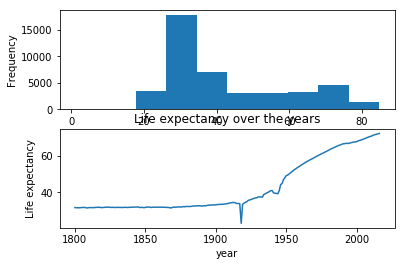

In [389]:
# Add first subplot
plt.subplot(2, 1, 1) 

# Create a histogram of life_expectancy
gapminder.life_expectancy.plot(kind='hist')

# Group gapminder: gapminder_agg
gapminder_agg = gapminder.groupby('year')['life_expectancy'].mean()

# Print the head of gapminder_agg
print(gapminder_agg.head())

# Print the tail of gapminder_agg
print(gapminder_agg.tail())

# Add second subplot
plt.subplot(2, 1, 2)

# Create a line plot of life expectancy per year
gapminder_agg.plot()

# Add title and specify axis labels
plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')